## Homework #11 - Hyperparameter Tuning

### Overview:
In the last topic, you learned what Hyperparameter Tuning is. In
this homework, we invite you to explore the effect of hyperparameters
on the performance metrics of different models.

### Task:
For this chapter, you will have to do the following:
* Import both Data Sets.
* Clean both Data Sets.
* Create a line plot with the number of neighbors of KNN on the
X-axis and the model’s accuracy on the Y-axis on the **classification** Data
Set.
* Create a line plot with the number of neighbors of KNN (Regression
version) on the X-axis and the MSE of the model on the Y-axis on the
**regression** Data Set.
* Create a heatmap using the `TreeDecissionClassifier` using the
`max_depth` as X-axis, and `max_features` as the Y-axis and the color of
the map should depend on the accuracy of the model on the **classification**
Data Set for the `criterion = gini`.
* Create a heatmap using the `TreeDecissionClassifier` using the
`max_depth` as X-axis, and `max_features` as Y-axis, and the color of
the map should depend on the accuracy of the model on the **classification**
Data Set for the `criterion = entropy`.
* Create a heatmap using the `TreeDecissionRegression` using the
`max_depth` as X-axis, and `max_features` as Y-axis, and the color of
the map should depend on the MSE of the model on the **regression** Data
Set for the `criterion  =  friedman_mse`.
* Create a heatmap using the `TreeDecissionRegression` using the
`max_depth` as X-axis, and `max_features` as Y-axis, and the color of
the map should depend on the MSE of the model on the **regression** Data
Set for the `criterion = poisson`.
* Create a line plot using the `RandomForestClassifier` containing 2
lines for `criterion = gini` and one for `criterion = entropy` on X-axis
should be the `n_estimators` and one Y-axis the accuracy of the model
on the **classification** Data Set.
* Create a line plot using the `RandomForestRegressor` containing 3
lines for `criterion = "squared_error"`, `criterion = "absolute_error"`
and one for `criterion = "poisson"`, on X-axis should be the
`n_estimators` and on the Y-axis the MSE of the model on the **regression**
Data Set.
* Create a line plot using the SVC model containing 3 lines for `kernel = 'poly'`, `'rbf'`, `'sigmoid'` on the X-axis should be the `C` and one
Y-axis the accuracy of the model on the **classification** Data Set.
* Create a line plot using the SVR model containing 3 lines for `kernel = 'poly'`, `'rbf'`, `'sigmoid'` on the X-axis should be the `C` and one
Y-axis the MSE of the model on the **regression** Data Set.
* Please extract a conclusion for every plot that you make.

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.dtypes import StringDType
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR, SVC

#### Task 11.1 - Import Datasets

Since I have 2 different problems: Classification and Regression Problems, I had to select 2 datasets, that will be used to train all the corresponding classification and
regression models:
* **Classification Problem**: I selected Body Performance Dataset, since its Target Feature is categorical (`class`), with the following values - 5 classes (A, B, C, D)
* **Regression Problem**: For this, I selected Electric Motor Temperature Dataset, which have different Target Feature columns, depending on the task at hand, but I decided
to go with the most common one for this set and selected as a Target Feature - Rotor Temperature (`pm`), with numerical continuous values.

In [2]:
body_performance_df: pd.DataFrame = pd.read_csv("dataset/bodyPerformance.csv")
electric_motors_measures_df: pd.DataFrame = pd.read_csv("dataset/measures_v2.csv")

In [3]:
body_performance_df.head(n=5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
body_performance_df.tail(n=5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
13388,25.0,M,172.1,71.8,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.9,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.5,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.7,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D
13392,34.0,M,164.0,66.1,19.5,82.0,150.0,35.9,7.1,51.0,180.0,C


In [5]:
electric_motors_measures_df.head(n=5)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [6]:
electric_motors_measures_df.tail(n=5)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71
1330815,-2.100158,30.721319,45.132307,0.807309,41.734763,0.004395,-2.000792,1.096487,62.131429,38.660370,24.027522,-2.139547e-60,71


#### Task 11.2 - Clean Datasets

##### Task 11.2.1 - Clean Body Performance Dataset

For the start, I decided to use the `info()` method in order to view brief information about it, such as: Total number of sample examples, count of non-null rows, each of
the columns data type.

In [7]:
body_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [8]:
null_counters: pd.Series = pd.Series(data=body_performance_df.isnull().sum(),
                                     name='Null Counter')
null_counters

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
Name: Null Counter, dtype: int64

As it may be seen, there are no Null Values in the dataset. However, for columns with `dtype = object` NaN values may be replaced with empty spaces, that are not considered
null values and will not increment the counter. In order to verify if there are Null values in form of empty spaces in those columns, I decided to check manually their
presence. In the following cell, I iterate over Object Columns and check their unique values.

In [9]:
for column_name in body_performance_df.columns:
    if body_performance_df[column_name].dtype == 'object':
        print(f"Column Name = {column_name}: Unique Values = {body_performance_df[column_name].unique()}")

Column Name = gender: Unique Values = ['M' 'F']
Column Name = class: Unique Values = ['C' 'A' 'B' 'D']


As it may be noticed, in object columns, which are `gender` and `class` cols, there are no Null values, only corresponding 'categories'.

Next, in order to replace those values, I will be using sklearn Encoders, which require "pre-training" on training set and then using the found values for the categories,
to transform separately both subsets. Therefore, I need to separate the dataset into training and test subsets.

In [10]:
body_performance_X: pd.DataFrame = body_performance_df.drop(labels=['class'], axis=1)
body_performance_y: pd.Series = body_performance_df['class']
(body_performance_X_train, body_performance_X_test,
 body_performance_y_train, body_performance_y_test) = train_test_split(body_performance_X,
                                                                       body_performance_y,
                                                                       test_size=.2,
                                                                       random_state=42)

In [11]:
# body_performance_train, body_performance_test = train_test_split(body_performance_df,
#                                                                  test_size=.2,
#                                                                  random_state=42)

In [12]:
# body_performance_train.head(n=5)

In [13]:
# body_performance_test.head(n=5)

In [14]:
# body_performance_df.iloc[body_performance_train.index[0], :]

In [15]:
body_performance_X_train.head(n=5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
8045,27.0,M,173.8,87.00,24.1,95.0,158.0,39.9,22.5,50.0,189.0
12964,22.0,F,160.7,45.80,23.4,79.0,125.0,23.8,32.2,35.0,143.0
12642,49.0,F,149.9,61.60,40.7,95.0,129.0,22.7,19.2,8.0,148.0
9002,36.0,M,179.6,81.10,15.9,80.0,131.0,51.2,6.8,46.0,216.0
12596,30.0,M,168.6,69.64,21.9,99.0,137.0,43.7,20.9,59.0,242.0


In [16]:
body_performance_y_train.head(n=5)

8045     D
12964    B
12642    D
9002     C
12596    A
Name: class, dtype: object

In order to check if the split was correct, I will compare the resulting subsets based on a single observation of the first row from training set against the observation
under the same index in the original dataset.

In [17]:
body_performance_df.iloc[body_performance_y_train.index[0], :]

age                         27.0
gender                         M
height_cm                  173.8
weight_kg                   87.0
body fat_%                  24.1
diastolic                   95.0
systolic                   158.0
gripForce                   39.9
sit and bend forward_cm     22.5
sit-ups counts              50.0
broad jump_cm              189.0
class                          D
Name: 8045, dtype: object

Next, I had to convert those Object columns into Numerical Categorical Columns. Since Gender Column is a binary one, I used **One Hot Encoder**, that will map each
category to a new binary column, and will drop one of the columns in order to avoid **Dummy Variable Trap** (compromising models accuracy by breaking the independence
between features, making them highly correlated, or multi-collinear). At the same time, due to the fact that Class Column is the Target Column, I used **Label Encoder**,
that is designed specifically to encode Target Variable column.

Also, I decided to use a concept called Column Transformer, that is used to transform specific columns in a dataset independently. In my case, I will have 2
transformations here - One-Hot Encoding and Label Encoding. However, when I executed the code, I got error `cannot copy the instance of the object`

In [18]:
# body_performance_col_transform: ColumnTransformer = ColumnTransformer(transformers=[
#     ('oneHotEncoding', oneHotEncoder, ['gender']),
#     ('labelEncoding', LabelEncoder, ['class'])
# ], remainder='passthrough', verbose_feature_names_out=False)

In [19]:
# transformed = body_performance_col_transform.fit_transform(body_performance_X_train)
# body_performance_X_train = pd.DataFrame(transformed,
#                                         columns=body_performance_col_transform.get_feature_names_out(),
#                                         index=body_performance_X_train.index)

In [20]:
# body_performance_X_train.head(n=5)

In [21]:
# transformed = body_performance_col_transform.transform(body_performance_X_test)
# body_performance_X_test = pd.DataFrame(transformed,
#                                        columns=body_performance_col_transform.get_feature_names_out(),
#                                        index=body_performance_X_test.index)

In [22]:
# body_performance_X_test.head(n=5)

In [23]:
oneHotEncoder: OneHotEncoder = OneHotEncoder(drop='first', sparse_output=False)

In [24]:
encoded_gender_column_train = oneHotEncoder.fit_transform(body_performance_X_train[['gender']])
encoded_gender_col_names = oneHotEncoder.get_feature_names_out(['gender'])
encoded_gender_df_train = pd.DataFrame(data=encoded_gender_column_train,
                                 columns=encoded_gender_col_names,
                                 index=body_performance_X_train.index)
body_performance_X_train = pd.concat([body_performance_X_train.drop(columns=['gender']), encoded_gender_df_train], axis=1)

In [25]:
encoded_gender_column_test = oneHotEncoder.transform(body_performance_X_test[['gender']])
encoded_gender_col_names = oneHotEncoder.get_feature_names_out(['gender'])
encoded_gender_df_test = pd.DataFrame(data=encoded_gender_column_test,
                                 columns=encoded_gender_col_names,
                                 index=body_performance_X_test.index)
body_performance_X_test = pd.concat([body_performance_X_test.drop(columns=['gender']), encoded_gender_df_test], axis=1)

In [26]:
# body_performance_X_train['gender'] = oneHotEncoder.fit_transform(X=body_performance_X_train['gender'].to_numpy().reshape(-1, 1))
# body_performance_X_test['gender'] = oneHotEncoder.transform(X=body_performance_X_test['gender'].to_numpy().reshape(-1, 1))

In [27]:
body_performance_X_train.head(n=5)

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_M
8045,27.0,173.8,87.00,24.1,95.0,158.0,39.9,22.5,50.0,189.0,1.0
12964,22.0,160.7,45.80,23.4,79.0,125.0,23.8,32.2,35.0,143.0,0.0
12642,49.0,149.9,61.60,40.7,95.0,129.0,22.7,19.2,8.0,148.0,0.0
9002,36.0,179.6,81.10,15.9,80.0,131.0,51.2,6.8,46.0,216.0,1.0
12596,30.0,168.6,69.64,21.9,99.0,137.0,43.7,20.9,59.0,242.0,1.0


As it may be noticed, the column `gender` is no longer a part of the dataset, but a new column `gender_M` appeared, which is a binary column, that will match in the
following manner the categories:
$$
\begin{gather*}
\vec{x}^{(i)}_{gender=Male} = 1 \\
\vec{x}^{(i)}_{gender=Female} = 0
\end{gather*}
$$

In [28]:
body_performance_X_test.head(n=5)

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_M
10635,21.0,167.4,72.18,40.0,82.0,133.0,18.7,-4.0,21.0,94.0,0.0
5496,42.0,162.3,67.30,18.0,64.0,130.0,48.5,15.2,52.0,219.0,1.0
13055,36.0,178.5,90.50,14.7,87.0,125.0,64.0,26.4,45.0,262.0,1.0
11826,23.0,180.9,77.10,25.4,86.0,139.0,41.2,10.0,43.0,224.0,1.0
1326,53.0,177.3,88.48,35.6,76.0,130.0,36.3,6.4,18.0,183.0,1.0


In [29]:
body_performance_df.iloc[body_performance_X_train.index[0], :]

age                         27.0
gender                         M
height_cm                  173.8
weight_kg                   87.0
body fat_%                  24.1
diastolic                   95.0
systolic                   158.0
gripForce                   39.9
sit and bend forward_cm     22.5
sit-ups counts              50.0
broad jump_cm              189.0
class                          D
Name: 8045, dtype: object

Next, I will perform the Label Encoding on target variable.

In [30]:
labelEncoder: LabelEncoder = LabelEncoder()

In [31]:
body_performance_y_train_enc = labelEncoder.fit_transform(y=body_performance_y_train)
body_performance_y_train = pd.Series(data=body_performance_y_train_enc,
                                     name=body_performance_y_train.name,
                                     index=body_performance_y_train.index)
body_performance_y_test_enc = labelEncoder.transform(y=body_performance_y_test)
body_performance_y_test = pd.Series(data=body_performance_y_test_enc,
                                    name=body_performance_y_test.name,
                                    index=body_performance_y_test.index)

In [32]:
body_performance_y_train.head(n=5)

8045     3
12964    1
12642    3
9002     2
12596    0
Name: class, dtype: int64

In [33]:
body_performance_y_test.head(n=5)

10635    3
5496     0
13055    2
11826    2
1326     3
Name: class, dtype: int64

In [34]:
labelEncoder.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [35]:
body_performance_df.iloc[body_performance_y_train.index[0], :]

age                         27.0
gender                         M
height_cm                  173.8
weight_kg                   87.0
body fat_%                  24.1
diastolic                   95.0
systolic                   158.0
gripForce                   39.9
sit and bend forward_cm     22.5
sit-ups counts              50.0
broad jump_cm              189.0
class                          D
Name: 8045, dtype: object

As a result, the LabelEncoder was fit on the training subset of targets and found the appropriate mapping:
$$
\begin{gather*}
\vec{y}^{(i)}_{class=A} = 0 \\
\vec{y}^{(i)}_{class=B} = 1 \\
\vec{y}^{(i)}_{class=C} = 2 \\
\vec{y}^{(i)}_{class=D} = 3
\end{gather*}
$$

In [36]:
body_performance_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10714 entries, 8045 to 7270
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      10714 non-null  float64
 1   height_cm                10714 non-null  float64
 2   weight_kg                10714 non-null  float64
 3   body fat_%               10714 non-null  float64
 4   diastolic                10714 non-null  float64
 5   systolic                 10714 non-null  float64
 6   gripForce                10714 non-null  float64
 7   sit and bend forward_cm  10714 non-null  float64
 8   sit-ups counts           10714 non-null  float64
 9   broad jump_cm            10714 non-null  float64
 10  gender_M                 10714 non-null  float64
dtypes: float64(11)
memory usage: 1004.4 KB


In [37]:
body_performance_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2679 entries, 10635 to 8545
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      2679 non-null   float64
 1   height_cm                2679 non-null   float64
 2   weight_kg                2679 non-null   float64
 3   body fat_%               2679 non-null   float64
 4   diastolic                2679 non-null   float64
 5   systolic                 2679 non-null   float64
 6   gripForce                2679 non-null   float64
 7   sit and bend forward_cm  2679 non-null   float64
 8   sit-ups counts           2679 non-null   float64
 9   broad jump_cm            2679 non-null   float64
 10  gender_M                 2679 non-null   float64
dtypes: float64(11)
memory usage: 251.2 KB


In [38]:
body_performance_y_train.info()

<class 'pandas.core.series.Series'>
Index: 10714 entries, 8045 to 7270
Series name: class
Non-Null Count  Dtype
--------------  -----
10714 non-null  int64
dtypes: int64(1)
memory usage: 167.4 KB


In [39]:
body_performance_y_test.info()

<class 'pandas.core.series.Series'>
Index: 2679 entries, 10635 to 8545
Series name: class
Non-Null Count  Dtype
--------------  -----
2679 non-null   int64
dtypes: int64(1)
memory usage: 41.9 KB


As a result, I have 4 subsets, both X (features) and y (targets) for Training and Test Subsets, that have no Null values and are all adhering to the numerical values
format.

##### Task 11.2.2 - Clean Electric Motor Measures Dataset

In [40]:
electric_motors_measures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


I tried to train regression models on the entire dataset that has more than 1330000 of training examples, and it was taking days to train the models, which I did not enjoy
to be honest, especially when I was leaving the training process to run overnight to wake up and see that there was either a mistake in declarations or no progress at all even
on the smallest values of the hyperparameters. I decided to take a smaller portion of the dataset for each model in order to train the models in reasonable amount of time.

In [41]:
null_counters: pd.Series = pd.Series(data=electric_motors_measures_df.isnull().sum(), name='Null Counter')
null_counters

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
Name: Null Counter, dtype: int64

As a result, I found out that this dataset contains only numerical data and has no Null Values, therefore, no imputation or conversion is needed. However, there is a column
`profile_id` that contains integers for identification of each row, which has no useful information for the training of the models, therefore I drop it.

In [42]:
electric_motors_measures_df.drop(columns=['profile_id'], inplace=True) # Good to Know: Alternative for labels=[...] with axis=1 (column drop)
electric_motors_measures_df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60


Next, I do the split of this dataset into subsets based on features and target columns, as well as Training and Test subsets.

In [43]:
electric_motors_measures_df_copy = electric_motors_measures_df.copy(deep=True)

In [44]:
# electric_motors_measures_X: pd.DataFrame = electric_motors_measures_df.drop(columns=['pm'])
# electric_motors_measures_y: pd.Series = electric_motors_measures_df['pm']
# (electric_motors_measures_X_train, electric_motors_measures_X_test,
#  electric_motors_measures_y_train, electric_motors_measures_y_test) = train_test_split(electric_motors_measures_X,
#                                                                                        electric_motors_measures_y,
#                                                                                        test_size=.3,
#                                                                                        random_state=42)

In [45]:
# electric_motors_measures_X_train.head(n=5)

In [46]:
# electric_motors_measures_y_train.head(n=5)

In [47]:
# electric_motors_measures_df.iloc[electric_motors_measures_X_train.index[0], :]

The split was done correctly, as it may be seen from the comparison between original dataset row with the index `1133863` and the one with the same index in the split
subsets.

### Classification Problems

In [48]:
classification_results_table: pd.DataFrame = pd.DataFrame(columns=['Model', 'Hyperparameter', 'Accuracy'])

#### Task 11.3 - KNN-Classifier
I had to create a Line Plot where on X-axis would be a range of values for the number of neighbors hyperparameter for a KNN classifier model, and on the Y-axis - the
accuracy per each value of the mentioned parameter.

In [49]:
num_neighbors = np.arange(start=1, stop=51, step=1)
accuracy_array = np.array([], dtype=float)

for neighbor_param in num_neighbors:
    knn_classifier: KNeighborsClassifier = KNeighborsClassifier(n_neighbors=neighbor_param)
    knn_classifier.fit(X=body_performance_X_train, y=body_performance_y_train)
    body_performance_y_hat = knn_classifier.predict(X=body_performance_X_test)
    accuracy = knn_classifier.score(X=body_performance_X_test, y=body_performance_y_test)
    print(f"Num Neighbors: {neighbor_param}: Accuracy = {accuracy}")
    accuracy_array = np.append(accuracy_array, [accuracy])

Num Neighbors: 1: Accuracy = 0.5240761478163494
Num Neighbors: 2: Accuracy = 0.5218365061590146
Num Neighbors: 3: Accuracy = 0.5449794699514744
Num Neighbors: 4: Accuracy = 0.5543113101903695
Num Neighbors: 5: Accuracy = 0.5655095184770437
Num Neighbors: 6: Accuracy = 0.5617767823814857
Num Neighbors: 7: Accuracy = 0.5681224337439343
Num Neighbors: 8: Accuracy = 0.5696155281821575
Num Neighbors: 9: Accuracy = 0.5729749906681597
Num Neighbors: 10: Accuracy = 0.576334453154162
Num Neighbors: 11: Accuracy = 0.58006718924972
Num Neighbors: 12: Accuracy = 0.586039567002613
Num Neighbors: 13: Accuracy = 0.5893990294886151
Num Neighbors: 14: Accuracy = 0.5834266517357223
Num Neighbors: 15: Accuracy = 0.5893990294886151
Num Neighbors: 16: Accuracy = 0.589772303098171
Num Neighbors: 17: Accuracy = 0.5942515864128406
Num Neighbors: 18: Accuracy = 0.5994774169466218
Num Neighbors: 19: Accuracy = 0.595371407241508
Num Neighbors: 20: Accuracy = 0.5938783128032848
Num Neighbors: 21: Accuracy = 0.594

In [50]:
best_param = np.argmax(accuracy_array) + 1
best_accuracy = np.max(accuracy_array)
classification_results_table = pd.concat([classification_results_table,
                                          pd.DataFrame([['KNN-Classifier', f'n_neighbors = {best_param}', best_accuracy]],
                                                       columns=classification_results_table.columns)],
                                         axis=0,
                                         ignore_index=True)
print(f"KNN-Classifier Best Accuracy Score: {best_accuracy}")
print(f"Best Number of Neighbors: {best_param}")

KNN-Classifier Best Accuracy Score: 0.6061963419186264
Best Number of Neighbors: 32


C:\Users\user\AppData\Local\Temp\ipykernel_26728\1318665826.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  classification_results_table = pd.concat([classification_results_table,


In [51]:
classification_results_table

,Model,Hyperparameter,Accuracy
0,KNN-Classifier,n_neighbors = 32,0.606196


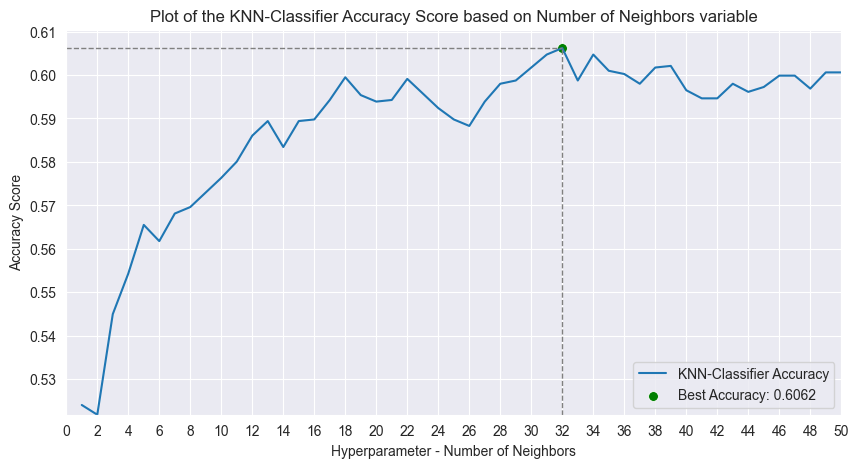

In [52]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=num_neighbors, y=accuracy_array, label='KNN-Classifier Accuracy')
sns.scatterplot(x=[np.argmax(a=accuracy_array) + 1],
                y=[np.max(a=accuracy_array)],
                markers="o",
                s=50,
                color='green',
                label="Best Accuracy: %.4f" % np.max(a=accuracy_array))
plt.plot([np.argmax(a=accuracy_array) + 1, np.argmax(a=accuracy_array) + 1],
         [np.min(a=accuracy_array), np.max(a=accuracy_array)],
         linestyle='--',
         color='gray',
         linewidth=1)
plt.plot([0, np.argmax(a=accuracy_array) + 1],
         [np.max(a=accuracy_array), np.max(a=accuracy_array)],
         linestyle='--',
         color='gray',
         linewidth=1)
plt.title("Plot of the KNN-Classifier Accuracy Score based on Number of Neighbors variable")
plt.xlabel("Hyperparameter - Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.xticks(ticks=[0] + [i for i in num_neighbors if i % 2 == 0])
plt.xlim(left=0, right=num_neighbors[-1])
plt.ylim(bottom=np.min(a=accuracy_array))
plt.legend()
plt.show()

As it may be seen, the best accuracy has been achieved at the number of neighbors: `num_neighbors=32`, with the accuracy of $Acc(KNN_{class}) \approx 0.6062$, with a fast
increase of the accuracy of the model with the $num_{neighbors} \in \left[ 1, 18 \right]$. After the maximum accuracy is achieved at the $num_{neighbors} = 32$, the
accuracy is slowly decreasing with number of neighbors increasing, due to the fact that it will capture other classes points, which will make the model perform worse.

##### Task 11.4 - Decision Tree Classifier
For this task, I had to create 2 Heatmaps where on the X axis would be the `max_depth` parameter and on the Y axis - `max_features` parameter. For the hue, I had to use
another hyperparameter - `criterion`, which in the case of the first heatmap will be `criterion = gini` and of the second heatmap - `criterion = entropy`.
* `max_depth` - is the hyperparameter that specifies the maximum depth, or levels that will be in the build Decision tree,
* `max_features` - is the number of features that is taken in consideration each time to make a split decision.
* `criterion` - the function that will measure the quality for each split. Specifically, there might be 3 possible parameters - `gini`, `entropy` and `log_loss`

For Gini Impurity, the function looks like this:
$$
\begin{gather*}
Gini(N) = 1 - \sum^k_{i=1} p^2_i \text{, where } p^2_i \text{ - probability of samples belonging to class $i$ in that node and $k$ - total number of classes} \\
Gini(N) \in [0, 0.5]
\end{gather*}
$$
It shows the probability of incorrectly classifying a randomly chosen element in the node if it were randomly labeled according to the class distribution in the node. It
may take values between 0, which means that the node is pure (only one class is present there, making the decision sure, and 0.5, which means that the classes in the node
are distributed uniformly, and that there can not be made a clear decision on whether the features that were selected will lead to a specific target. The main task of
training in this case is to reduce the gini impurity as much as possible.

For Entropy, the function looks like this:
$$
\begin{gather*}
Entropy(N) = - \sum_{i=1}^k p_i \cdot \log_2(p_i) \text{, where } p^2_i \text{ - probability of samples belonging to class $i$ in that node and $k$ - total number of
classes} \\
Entropy(N) \in [0, 1]
\end{gather*}
$$
It measures the disorder of the features with the target, or the uncertainty of a set of points regarding their classification. It also can take values between 0, which
means that the node contains only one target class and that there is no uncertainty on the split decision, and 1, when the probability of the possible classes to be chosen
is equal.

In [53]:
max_depth_range = np.arange(start=1, stop=51, step=1)
max_features_range = np.arange(start=1, stop=body_performance_X_train.shape[1] + 1, step=1)
criteria_array = np.array(['gini', 'entropy'], dtype=StringDType())
heatmaps_dict: dict[str, pd.DataFrame] = {}

for i, criterion in enumerate(criteria_array):
    heatmap_df: pd.DataFrame = pd.DataFrame(dtype=float, index=max_features_range, columns=max_depth_range)
    start_time = time.time()
    for max_depth_param in max_depth_range:
        for max_features_param in max_features_range:
            decision_tree_classifier = DecisionTreeClassifier(criterion=criterion,
                                                              max_depth=max_depth_param,
                                                              max_features=max_features_param)
            decision_tree_classifier.fit(X=body_performance_X_train, y=body_performance_y_train)
            body_performance_y_hat = decision_tree_classifier.predict(X=body_performance_X_test)
            accuracy = accuracy_score(y_true=body_performance_y_test, y_pred=body_performance_y_hat)
            print(f"Criterion: {criterion}, Max Depth: {max_depth_param}, Max Features: {max_features_param},  Accuracy: {accuracy}")

            heatmap_df.loc[max_features_param, max_depth_param] = accuracy
    end_time = time.time()
    total_time = (end_time - start_time) * 1000
    print(f"Time taken for Criterion = {criterion}: {total_time:.4f} milliseconds")
    heatmaps_dict[criterion] = heatmap_df

Criterion: gini, Max Depth: 1, Max Features: 1,  Accuracy: 0.3124300111982083
Criterion: gini, Max Depth: 1, Max Features: 2,  Accuracy: 0.2713699141470698
Criterion: gini, Max Depth: 1, Max Features: 3,  Accuracy: 0.307204180664427
Criterion: gini, Max Depth: 1, Max Features: 4,  Accuracy: 0.3956700261291527
Criterion: gini, Max Depth: 1, Max Features: 5,  Accuracy: 0.3956700261291527
Criterion: gini, Max Depth: 1, Max Features: 6,  Accuracy: 0.3956700261291527
Criterion: gini, Max Depth: 1, Max Features: 7,  Accuracy: 0.3956700261291527
Criterion: gini, Max Depth: 1, Max Features: 8,  Accuracy: 0.3956700261291527
Criterion: gini, Max Depth: 1, Max Features: 9,  Accuracy: 0.3956700261291527
Criterion: gini, Max Depth: 1, Max Features: 10,  Accuracy: 0.3956700261291527
Criterion: gini, Max Depth: 1, Max Features: 11,  Accuracy: 0.3956700261291527
Criterion: gini, Max Depth: 2, Max Features: 1,  Accuracy: 0.3833519970138111
Criterion: gini, Max Depth: 2, Max Features: 2,  Accuracy: 0.45

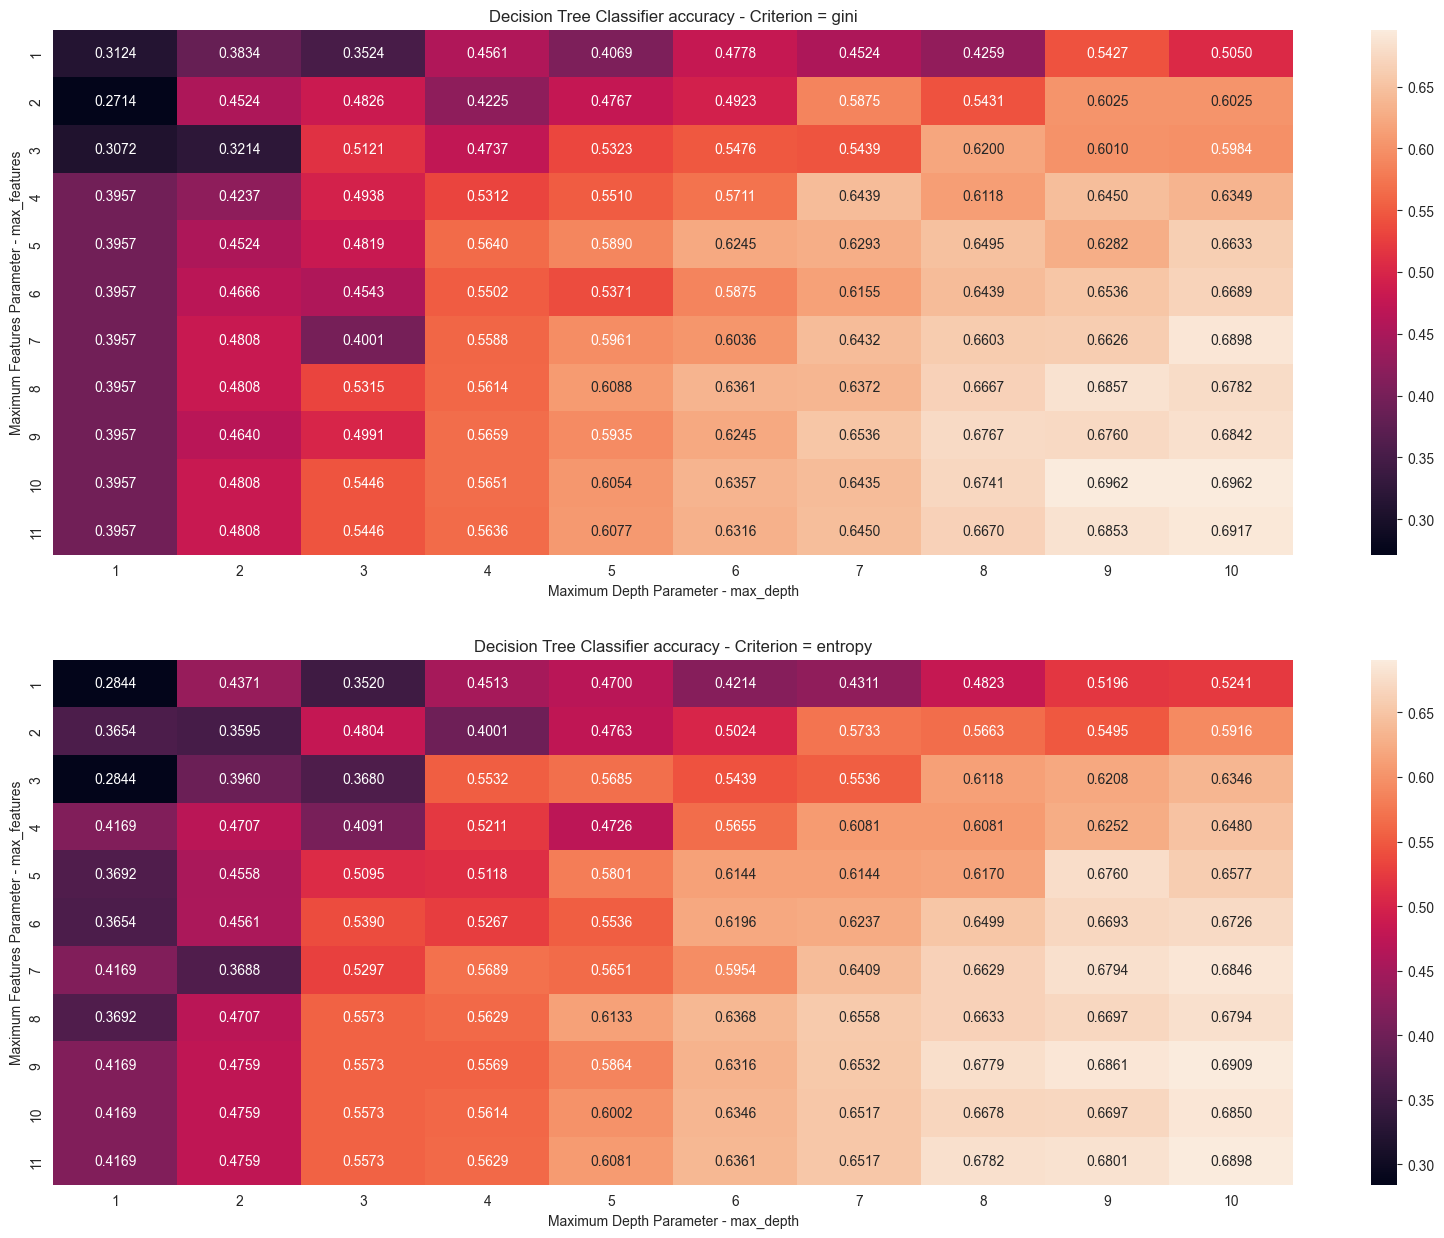

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
for i, (criterion, dataframe_criterion) in enumerate(heatmaps_dict.items()):
    sns.heatmap(data=dataframe_criterion.iloc[:, :10], annot=True, fmt='.4f', ax=axes[i])
    axes[i].set_xlabel('Maximum Depth Parameter - max_depth')
    axes[i].set_ylabel('Maximum Features Parameter - max_features')
    axes[i].set_title(f'Decision Tree Classifier accuracy - Criterion = {criterion}')

plt.show()

In [55]:
for i, (criterion, dataframe_criterion) in enumerate(heatmaps_dict.items()):
    best_accuracy = dataframe_criterion.max(axis=0).max()
    best_params = dataframe_criterion.stack().idxmax()
    best_max_depth_param = best_params[1]
    best_max_features_param = best_params[0]
    print(f'Criterion = {criterion}, Best Accuracy = {best_accuracy}, Best Max_Depth = {best_max_depth_param}, Best Max_Features = {best_max_features_param}')
    classification_results_table = pd.concat([classification_results_table,
                                          pd.DataFrame([['Decision Tree Classifier',
                                                         f'criterion = {criterion}, max_depth = {best_max_depth_param}, max_features = {best_max_features_param}',
                                                         best_accuracy]],
                                                       columns=classification_results_table.columns)],
                                         axis=0,
                                         ignore_index=True)

Criterion = gini, Best Accuracy = 0.7058603956700261, Best Max_Depth = 11, Best Max_Features = 10
Criterion = entropy, Best Accuracy = 0.6909294512877939, Best Max_Depth = 10, Best Max_Features = 9


In [56]:
classification_results_table.reset_index()

,index,Model,Hyperparameter,Accuracy
0,0,KNN-Classifier,n_neighbors = 32,0.606196
1,1,Decision Tree Classifier,"criterion = gini, max_depth = 11, max_features...",0.705860
2,2,Decision Tree Classifier,"criterion = entropy, max_depth = 10, max_featu...",0.690929


As a result, I obtained similar accuracies for the Decision Tree Classifier with both `gini` and `entropy` criterion. However, overall accuracy for `entropy` criterion is
slightly better, but it takes more time to compute since it calculates also the $\log$ operation, which is computationally expensive. For `gini` criterion, the results are slightly worse, but it takes less time to train the model with this criterion, since it operates with more basic mathematical operations.

##### Task 11.5 - Random Forest Classifier
For this task, I had to create a Line Plot where on the X axis would be the `n_estimators` parameter and on the Y axis - the accuracy of the models. On the Line Plot should
be 2 lines, one for each type of an another hyperparameter - `criterion`, which in the case of the first line will be `criterion = gini` and of the second line -
`criterion = entropy`.
* `n_estimators` - is the number of Decision Trees in the forest. By nature, Random Forest Model works based on the one generalized decision (in case of Classification -
most frequent value, in case of Regression - mean or weighted average value) from multiple Decision Trees trained on randomly selected samples and randomly selected
features.
* `criterion` - the function that will measure the quality for each split. Specifically, there might be 3 possible parameters - `gini`, `entropy` and `log_loss`

In [57]:
num_estimators_range = np.arange(start=1, stop=401, step=5)
criteria_array = np.array(['gini', 'entropy'], dtype=StringDType())

result_accuracies_df: pd.DataFrame = pd.DataFrame(dtype=float, index=num_estimators_range, columns=criteria_array)

for i, criterion in enumerate(criteria_array):
    start_time = time.time()
    for num_estimators_param in num_estimators_range:
        random_forest_classifier = RandomForestClassifier(criterion=criterion,
                                                          n_estimators=num_estimators_param)
        random_forest_classifier.fit(X=body_performance_X_train, y=body_performance_y_train)
        body_performance_y_hat = random_forest_classifier.predict(X=body_performance_X_test)
        accuracy = accuracy_score(y_true=body_performance_y_test, y_pred=body_performance_y_hat)
        print(f'Criterion: {criterion}, Number of Estimators: {num_estimators_param}, Accuracy: {accuracy}')

        result_accuracies_df.loc[num_estimators_param, criterion] = accuracy
    end_time = time.time()
    total_time = (end_time - start_time) * 1000
    print(f"Time taken for Criterion = {criterion}: {total_time:.4f} milliseconds")

Criterion: gini, Number of Estimators: 1, Accuracy: 0.5908921239268383
Criterion: gini, Number of Estimators: 6, Accuracy: 0.6961552818215753
Criterion: gini, Number of Estimators: 11, Accuracy: 0.7084733109369168
Criterion: gini, Number of Estimators: 16, Accuracy: 0.7282568122433744
Criterion: gini, Number of Estimators: 21, Accuracy: 0.723404255319149
Criterion: gini, Number of Estimators: 26, Accuracy: 0.730869727510265
Criterion: gini, Number of Estimators: 31, Accuracy: 0.7420679357969392
Criterion: gini, Number of Estimators: 36, Accuracy: 0.7368421052631579
Criterion: gini, Number of Estimators: 41, Accuracy: 0.7446808510638298
Criterion: gini, Number of Estimators: 46, Accuracy: 0.7428144830160508
Criterion: gini, Number of Estimators: 51, Accuracy: 0.7435610302351624
Criterion: gini, Number of Estimators: 56, Accuracy: 0.7487868607689436
Criterion: gini, Number of Estimators: 61, Accuracy: 0.748040313549832
Criterion: gini, Number of Estimators: 66, Accuracy: 0.75102650242627

In [58]:
for i, criterion in enumerate(criteria_array):
    best_accuracy = result_accuracies_df[criterion].max()
    best_param = result_accuracies_df[criterion].idxmax()
    print(f'Criterion = {criterion}, Best Accuracy = {best_accuracy}, Best Num_Estimators = {best_param}')
    classification_results_table = pd.concat([classification_results_table,
                                          pd.DataFrame([['Random Forest Classifier',
                                                         f'criterion = {criterion}, n_estimators = {best_param}',
                                                         best_accuracy]],
                                                       columns=classification_results_table.columns)],
                                         axis=0,
                                         ignore_index=True)

Criterion = gini, Best Accuracy = 0.7588652482269503, Best Num_Estimators = 131
Criterion = entropy, Best Accuracy = 0.7584919746173946, Best Num_Estimators = 336


In [59]:
classification_results_table

,Model,Hyperparameter,Accuracy
0,KNN-Classifier,n_neighbors = 32,0.606196
1,Decision Tree Classifier,"criterion = gini, max_depth = 11, max_features...",0.705860
2,Decision Tree Classifier,"criterion = entropy, max_depth = 10, max_featu...",0.690929
3,Random Forest Classifier,"criterion = gini, n_estimators = 131",0.758865
4,Random Forest Classifier,"criterion = entropy, n_estimators = 336",0.758492


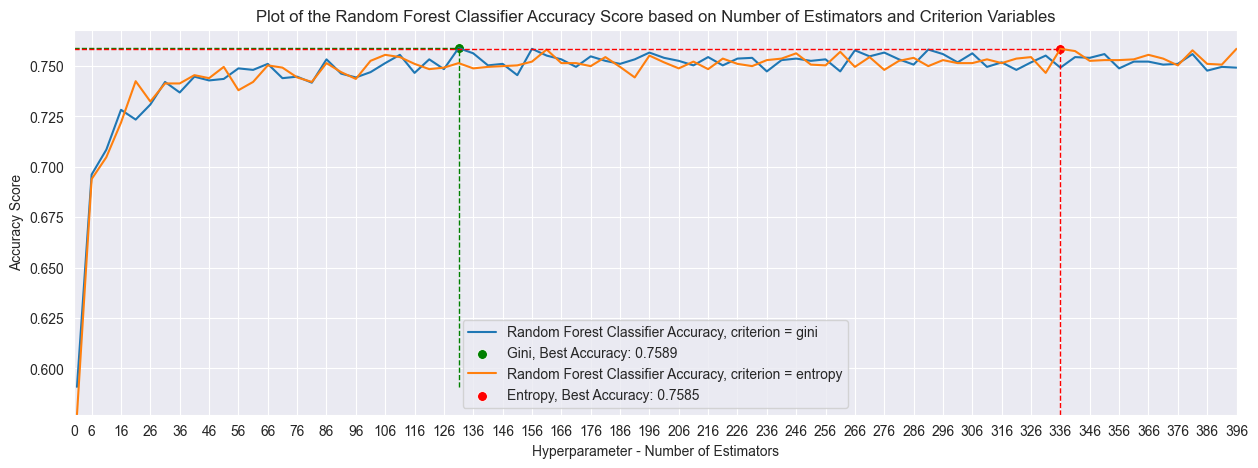

In [60]:
plt.figure(figsize=(15, 5))
mapping_plot_aspect = {
    'gini': 'green',
    'entropy': 'red'
}
for criterion, color in mapping_plot_aspect.items():
    sns.lineplot(x=num_estimators_range, y=result_accuracies_df[criterion], label=f'Random Forest Classifier Accuracy, criterion = {criterion}')

    sns.scatterplot(x=[result_accuracies_df[criterion].idxmax()],
                    y=[result_accuracies_df[criterion].max()],
                    markers="o",
                    s=50,
                    color=color,
                    label=f"{criterion.capitalize()}, Best Accuracy: %.4f" % np.max(a=result_accuracies_df[criterion]))

    plt.plot([result_accuracies_df[criterion].idxmax(), result_accuracies_df[criterion].idxmax()],
             [result_accuracies_df[criterion].min(), result_accuracies_df[criterion].max()],
             linestyle='--',
             color=color,
             linewidth=1)
    plt.plot([0, result_accuracies_df[criterion].idxmax()],
             [result_accuracies_df[criterion].max(), result_accuracies_df[criterion].max()],
             linestyle='--',
             color=color,
             linewidth=1)

plt.title("Plot of the Random Forest Classifier Accuracy Score based on Number of Estimators and Criterion Variables")
plt.xlabel("Hyperparameter - Number of Estimators")
plt.ylabel("Accuracy Score")
plt.xticks(ticks=[0] + [i for i in num_estimators_range if i % 2 == 0])
plt.xlim(left=0, right=num_estimators_range[-1])
plt.ylim(bottom=np.min(a=result_accuracies_df))
plt.legend()
plt.show()

As it may be seen, the main increase in Accuracy in both trained models is when the number of Estimators is $\in \left[ 1, 90 \right]$, which is very close to the default
value of this hyperparameter, which is `n_estimators = 100` in Scikit-learn. The results are slightly better for Random Forest Classifier with `criterion = entropy`, but,
as it was mentioned earlier, the main disadvantage of Entropy criterion for both Decision Tree and Random Forest models is that it is more computationally expensive, which
is clearly displayed in the time measures I performed ($346 \text{ seconds for Entropy Criterion} > 265 \text{ seconds for Gini Criterion}$)

##### Task 11.6 - Support Vector Machine Classifier
For this task, I had to plot a Line Plot with 3 lines for each model with different kernel hyperparameter - `poly`, `rbf` and `sigmoid`. Also, the plot will have on X
axis the `C` hyperparameter, that stands for Regularization Parameter, which tells the model how much it might misclassify sample points. In other words, since SVM task is
to maximize the margin region between the support vectors, it may encounter situations when a clear line is not possible to be found and there might be misclassified
points. So:
$$
\begin{gather*}
\text{Low } C \implies \text{ Larger Margin} \implies \text{higher Error }(\hat{y}_i \ne y_i) \\
\text{High } C \implies \text{ Narrower Margin} \implies \text{lower Error }(\hat{y}_i \ne y_i)
\end{gather*}
$$
Therefore, `C` is more of a trade-off between error and margin region width.

In [61]:
C_range = np.arange(start=1, stop=501, step=10)
kernel_array = np.array(['poly', 'rbf', 'sigmoid'], dtype=StringDType())

result_accuracies_df: pd.DataFrame = pd.DataFrame(dtype=float, index=C_range, columns=kernel_array)

for i, kernel in enumerate(kernel_array):
    start_time = time.time()
    for C_param in C_range:
        support_vector_machine_classifier = SVC(kernel=kernel,
                                                C=C_param)
        support_vector_machine_classifier.fit(X=body_performance_X_train, y=body_performance_y_train)
        body_performance_y_hat = support_vector_machine_classifier.predict(X=body_performance_X_test)
        accuracy = accuracy_score(y_true=body_performance_y_test, y_pred=body_performance_y_hat)
        print(f'Kernel: {kernel}, C: {C_param}, Accuracy: {accuracy}')

        result_accuracies_df.loc[C_param, kernel] = accuracy
    end_time = time.time()
    total_time = (end_time - start_time) * 1000
    print(f"Time taken for Kernel = {kernel}: {total_time:.4f} milliseconds")

Kernel: poly, C: 1, Accuracy: 0.6047032474804032
Kernel: poly, C: 11, Accuracy: 0.6308324001493094
Kernel: poly, C: 21, Accuracy: 0.641284061216872
Kernel: poly, C: 31, Accuracy: 0.6509891750653228
Kernel: poly, C: 41, Accuracy: 0.658454647256439
Kernel: poly, C: 51, Accuracy: 0.6614408361328854
Kernel: poly, C: 61, Accuracy: 0.6648002986188877
Kernel: poly, C: 71, Accuracy: 0.6644270250093318
Kernel: poly, C: 81, Accuracy: 0.6633072041806645
Kernel: poly, C: 91, Accuracy: 0.6644270250093318
Kernel: poly, C: 101, Accuracy: 0.6674132138857782
Kernel: poly, C: 111, Accuracy: 0.6677864874953341
Kernel: poly, C: 121, Accuracy: 0.6685330347144457
Kernel: poly, C: 131, Accuracy: 0.6685330347144457
Kernel: poly, C: 141, Accuracy: 0.6711459499813364
Kernel: poly, C: 151, Accuracy: 0.6715192235908921
Kernel: poly, C: 161, Accuracy: 0.6722657708100037
Kernel: poly, C: 171, Accuracy: 0.671892497200448
Kernel: poly, C: 181, Accuracy: 0.6730123180291153
Kernel: poly, C: 191, Accuracy: 0.67375886524

In [62]:
for i, kernel in enumerate(kernel_array):
    best_accuracy = result_accuracies_df[kernel].max()
    best_param = result_accuracies_df[kernel].idxmax()
    print(f'Criterion = {kernel}, Best Accuracy = {best_accuracy}, Best C = {best_param}')
    classification_results_table = pd.concat([classification_results_table,
                                          pd.DataFrame([['SVM Classifier',
                                                         f'kernel = {kernel}, C = {best_param}',
                                                         best_accuracy]],
                                                       columns=classification_results_table.columns)],
                                         axis=0,
                                         ignore_index=True)

Criterion = poly, Best Accuracy = 0.6763717805151176, Best C = 261
Criterion = rbf, Best Accuracy = 0.6849570735349011, Best C = 471
Criterion = sigmoid, Best Accuracy = 0.25942515864128407, Best C = 1


In [63]:
classification_results_table

,Model,Hyperparameter,Accuracy
0,KNN-Classifier,n_neighbors = 32,0.606196
1,Decision Tree Classifier,"criterion = gini, max_depth = 11, max_features...",0.705860
2,Decision Tree Classifier,"criterion = entropy, max_depth = 10, max_featu...",0.690929
3,Random Forest Classifier,"criterion = gini, n_estimators = 131",0.758865
4,Random Forest Classifier,"criterion = entropy, n_estimators = 336",0.758492
5,SVM Classifier,"kernel = poly, C = 261",0.676372
6,SVM Classifier,"kernel = rbf, C = 471",0.684957
7,SVM Classifier,"kernel = sigmoid, C = 1",0.259425


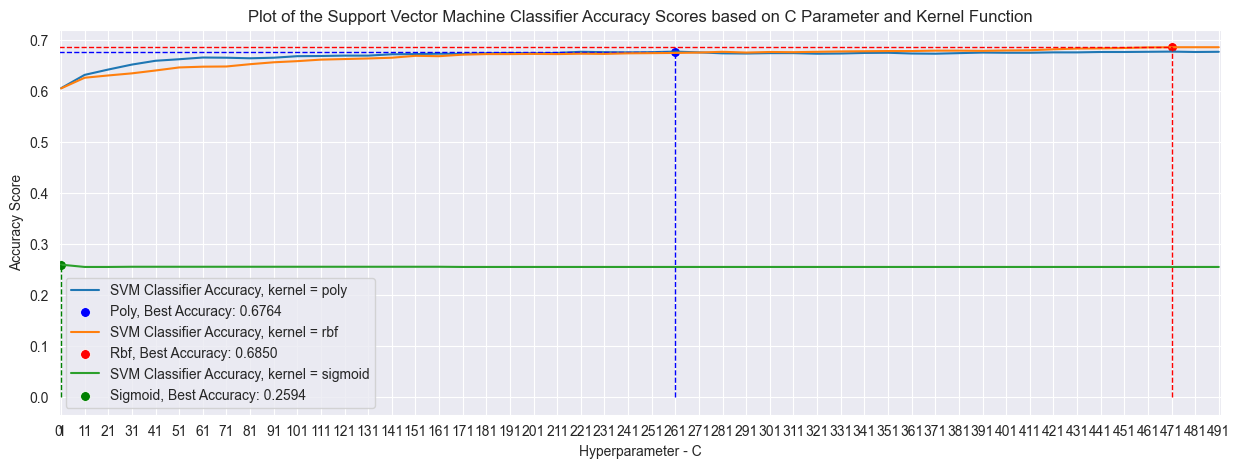

In [64]:
plt.figure(figsize=(15, 5))
mapping_plot_aspect = {
    'poly': 'blue',
    'rbf': 'red',
    'sigmoid': 'green'
}

for kernel, color in mapping_plot_aspect.items():
    sns.lineplot(x=C_range, y=result_accuracies_df[kernel], label=f'SVM Classifier Accuracy, kernel = {kernel}')

    sns.scatterplot(x=[result_accuracies_df[kernel].idxmax()],
                    y=[result_accuracies_df[kernel].max()],
                    markers="o",
                    s=50,
                    color=color,
                    label=f"{kernel.capitalize()}, Best Accuracy: %.4f" % np.max(a=result_accuracies_df[kernel]))

    plt.plot([result_accuracies_df[kernel].idxmax(), result_accuracies_df[kernel].idxmax()],
             [0, result_accuracies_df[kernel].max()],
             linestyle='--',
             color=color,
             linewidth=1)
    plt.plot([0, result_accuracies_df[kernel].idxmax()],
             [result_accuracies_df[kernel].max(), result_accuracies_df[kernel].max()],
             linestyle='--',
             color=color,
             linewidth=1)

plt.title("Plot of the Support Vector Machine Classifier Accuracy Scores based on C Parameter and Kernel Function")
plt.xlabel("Hyperparameter - C")
plt.ylabel("Accuracy Score")
plt.xticks(ticks=[0] + [i for i in C_range])
plt.xlim(left=0, right=C_range[-1] + 1)
plt.legend()
plt.show()

As it may be seen, SVMs with kernel `poly` and `rbf` performed the best, while `sigmoid` kernel showed worst results. This is due to the fact that this SVM expects a
"S"-shaped distribution of data, trying to fit a Sigmoid curve to the data. Also, it may perform worse since it expects 2 classes rather than 4 that are in the target
column of this dataset. For the rest of kernel functions, I observed that Polynomial Kernel performed better on low C than Radial-Basis Kernel, but on higher C, starting
from 261, which granted maximum Accuracy for Polynomial kernel SVM Classifier, RBF Kernel SVM Classifier performed better, but not significantly. Polynomial Kernel
performed longest of them 3, and it basically fits a polynomial curve to the data, while RBF goes to upper dimensions where the relationships in the dataset are linearly
separable, and performed twice as fast as Polynomial Kernel.

In [65]:
classification_results_table

,Model,Hyperparameter,Accuracy
0,KNN-Classifier,n_neighbors = 32,0.606196
1,Decision Tree Classifier,"criterion = gini, max_depth = 11, max_features...",0.705860
2,Decision Tree Classifier,"criterion = entropy, max_depth = 10, max_featu...",0.690929
3,Random Forest Classifier,"criterion = gini, n_estimators = 131",0.758865
4,Random Forest Classifier,"criterion = entropy, n_estimators = 336",0.758492
5,SVM Classifier,"kernel = poly, C = 261",0.676372
6,SVM Classifier,"kernel = rbf, C = 471",0.684957
7,SVM Classifier,"kernel = sigmoid, C = 1",0.259425


### Regression Problems

In [66]:
regression_results_table: pd.DataFrame = pd.DataFrame(columns=['Model', 'Hyperparameter', 'Mean-Squared Error'])

#### Task 11.7 - KNN-Regressor
I had to create a Line Plot where on X-axis would be a range of values for the number of neighbors hyperparameter for a KNN regressor model, and on the Y-axis - the
accuracy per each value of the mentioned parameter.

In [67]:
electric_motors_measures_df = electric_motors_measures_df_copy.sample(n=500000, random_state=42)
electric_motors_measures_X: pd.DataFrame = electric_motors_measures_df.drop(columns=['pm'])
electric_motors_measures_y: pd.Series = electric_motors_measures_df['pm']
(electric_motors_measures_X_train, electric_motors_measures_X_test,
 electric_motors_measures_y_train, electric_motors_measures_y_test) = train_test_split(electric_motors_measures_X,
                                                                                       electric_motors_measures_y,
                                                                                       test_size=.3,
                                                                                       random_state=42)

In [68]:
num_neighbors = np.arange(start=1, stop=51, step=1)
mse_array = np.array([], dtype=float)

for neighbor_param in num_neighbors:
    knn_regressor: KNeighborsRegressor = KNeighborsRegressor(n_neighbors=neighbor_param)
    knn_regressor.fit(X=electric_motors_measures_X_train, y=electric_motors_measures_y_train)
    electric_motors_measures_y_hat = knn_regressor.predict(X=electric_motors_measures_X_test)
    mse = mean_squared_error(y_true=electric_motors_measures_y_test, y_pred=electric_motors_measures_y_hat)
    print(f"Num Neighbors: {neighbor_param}, MSE = {mse}")
    mse_array = np.append(mse_array, [mse])

Num Neighbors: 1, MSE = 23.44079796708964
Num Neighbors: 2, MSE = 19.501581368180975
Num Neighbors: 3, MSE = 18.54236344504027
Num Neighbors: 4, MSE = 18.273805315014606
Num Neighbors: 5, MSE = 18.31319428479388
Num Neighbors: 6, MSE = 18.402027170931532
Num Neighbors: 7, MSE = 18.531879847802458
Num Neighbors: 8, MSE = 18.74691843089971
Num Neighbors: 9, MSE = 18.96570078357546
Num Neighbors: 10, MSE = 19.17478114966121
Num Neighbors: 11, MSE = 19.395306898269673
Num Neighbors: 12, MSE = 19.62113661128079
Num Neighbors: 13, MSE = 19.855664571201334
Num Neighbors: 14, MSE = 20.094626934171412
Num Neighbors: 15, MSE = 20.327219482924086
Num Neighbors: 16, MSE = 20.566835979688868
Num Neighbors: 17, MSE = 20.77649971132259
Num Neighbors: 18, MSE = 20.990748598785753
Num Neighbors: 19, MSE = 21.212950454511628
Num Neighbors: 20, MSE = 21.440237338627647
Num Neighbors: 21, MSE = 21.64073470362934
Num Neighbors: 22, MSE = 21.847825143523853
Num Neighbors: 23, MSE = 22.06058488350759
Num Nei

In [69]:
best_param = np.argmin(mse_array) + 1
best_mse = np.min(mse_array)
regression_results_table = pd.concat([regression_results_table,
                                          pd.DataFrame([['KNN-Regressor', f'n_neighbors = {best_param}', best_mse]],
                                                       columns=regression_results_table.columns)],
                                         axis=0,
                                         ignore_index=True)
print(f"KNN-Regressor Best MSE Score: {best_mse}")
print(f"Best Number of Neighbors: {best_param}")

KNN-Regressor Best MSE Score: 18.273805315014606
Best Number of Neighbors: 4


C:\Users\user\AppData\Local\Temp\ipykernel_26728\2476075029.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regression_results_table = pd.concat([regression_results_table,


In [70]:
regression_results_table

,Model,Hyperparameter,Mean-Squared Error
0,KNN-Regressor,n_neighbors = 4,18.273805


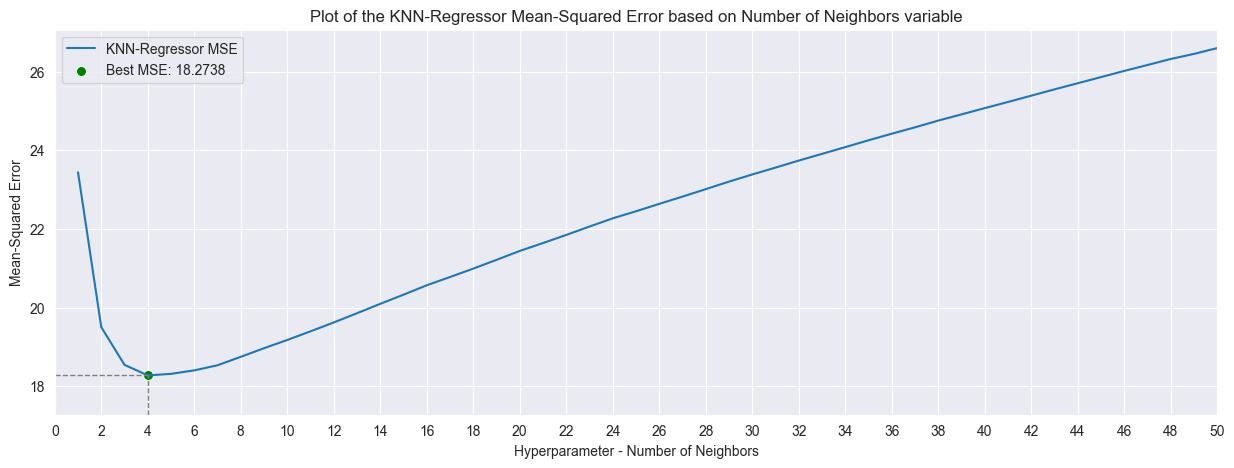

In [71]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=num_neighbors, y=mse_array, label='KNN-Regressor MSE')
sns.scatterplot(x=[np.argmin(a=mse_array) + 1],
                y=[np.min(a=mse_array)],
                markers="o",
                s=50,
                color='green',
                label="Best MSE: %.4f" % np.min(a=mse_array))
plt.plot([np.argmin(a=mse_array) + 1, np.argmin(a=mse_array) + 1],
         [np.min(a=mse_array) - 1, np.min(a=mse_array)],
         linestyle='--',
         color='gray',
         linewidth=1)
plt.plot([0, np.argmin(a=mse_array) + 1],
         [np.min(a=mse_array), np.min(a=mse_array)],
         linestyle='--',
         color='gray',
         linewidth=1)
plt.title("Plot of the KNN-Regressor Mean-Squared Error based on Number of Neighbors variable")
plt.xlabel("Hyperparameter - Number of Neighbors")
plt.ylabel("Mean-Squared Error")
plt.xticks(ticks=[0] + [i for i in num_neighbors if i % 2 == 0])
plt.xlim(left=0, right=num_neighbors[-1])
plt.ylim(bottom=np.min(a=mse_array) - 1)
plt.legend()
plt.show()

As it may be seen, the best MSE has been achieved at the number of neighbors: `num_neighbors=4`, with the MSE of $Acc(KNN_{regressor}) \approx 13.7633$, with a fast
decrease of the MSE of the model with the $num_{neighbors} \in \left[ 1, 4 \right]$. After the minimum error is achieved at the $num_{neighbors} = 4$, the
accuracy is slowly decreasing with number of neighbors increasing, due to the fact that it will capture other classes points, which will make the model perform worse. As a
interesting fact, the default value for the number of neighbors in Scikit-learn algorithm implementation is `n_neighbors = 5`, which is very close to the value that granted
me the best MSE.

##### Task 11.8 - Decision Tree Regressor
For this task, I had to create 2 Heatmaps where on the X axis would be the `max_depth` parameter and on the Y axis - `max_features` parameter. For the hue, I had to use
another hyperparameter - `criterion`, which in the case of the first heatmap will be `criterion = friedman_mse` and of the second heatmap - `criterion = poisson`.
* `max_depth` - is the hyperparameter that specifies the maximum depth, or levels that will be in the build Decision tree,
* `max_features` - is the number of features that is taken in consideration each time to make a split decision.
* `criterion` - the function that will measure the quality for each split. Specifically, there might be 4 possible parameters - `squared_error`, `absolute_error`, `friedman_mse`
and `poisson`.

For Friedman MSE, which is a boosted version of MSE (Mean-Squared Error) algorithm. It performs the following:
$$
\begin{gather*}
i^2(R_l, R_r) = \frac{w_lw_r}{w_l + w_r} \left( \overline{y}_l - \overline{y}_r \right)^2 \\
R_l, R_r \text{ - left and right subregions, or nodes after a split} \\
w_l, w_r \text{ - left and right weights} \\
w_l = \sum_{i \in R_l} w_l(x_i) = \sum_{i \in R_l} p_k(x_i)(1-p_k(x_i)) \text{ - probability that in a given region $l$, every $x_i$ belongs to a certain class $k$} \\
\overline{y}_l, \overline{y}_r \text{ - weighted mean of the target values in the subregion $l$ or $r$}
\end{gather*}
$$
It shows the improvement for a specific split decision in the Decision Tree training process. In other words, it will iterate over all possible splits at a certain point and
will try to maximize the Improvement $i^2$ function. When the maximum improvement is found, it will be kept and the split will be done using that specific decision that
maximizes the improvement. If both subregions have similar classes, they will be penalized with low improvement, since no concrete decision is made in this case, such that
the split will result into nodes with different classes.

For Poisson MSE, which is also called Half Poisson Deviance, used when $y$ target variables are adhering to the concept of count data and are distributed according to the
Poisson Distribution, for example number of clicks on an ad.
$$
\begin{gather*}
D(Q_m) = \frac{2}{n_m} \sum_{y \in Q_m} (y_i \log\frac{y_i}{\bar{y}_m} - y_i + \bar{y}_m) \\
H(Q_m) = \frac{1}{n_m} \sum_{y \in Q_m} (y_i \log\frac{y_i}{\bar{y}_m} - y_i + \bar{y}_m) \\
\bar{y}_m = \frac{1}{n_m} \sum_{i \in Q_m} y_i \\
n_m \bar{y}_m = \sum_{i \in Q_m} y_i \\
\sum_{y \in Q_m} \left(- y_i + \bar{y}_m \right) = - \left( \sum_{y \in Q_m} y_i - \sum_{y \in Q_m} \bar{y}_m \right) = - (n_m \bar{y}_m - n_m \bar{y}_m) = 0\\
H_{optimized}(Q_m) = \frac{1}{n_m} \sum_{y \in Q_m} \left( y \log\frac{y}{\bar{y}_m} \right) \\
Q_m \text{ - the subregion, or the node M} \\
n_m \text{ - the number of samples in the node M} \\
y_i \log\frac{y_i}{\bar{y}_m} \text{ - the discrepancy between the true value and predicted value. If $\bar{y_m} = y_i$, the discrepancy is 0, which means ideal prediction}
\end{gather*}
$$
The factor of 2 is omitted, since it is useless for the split that minimizes the impurity at each node, because it applies to all the splits. It is done in order to make
computation faster. Also, taken into account that the Poisson Deviance is non-negative, and $y_{pred} = \overline{y}_m$ is constant across all the iterations of the sum,
therefore the sum will end up to 0, therefore it might get removed as well, achieving a more optimized implementation. The main goal of the algorithm is to maximize the reduction
in deviance, or to minime the deviance itself.

In [72]:
electric_motors_measures_df = electric_motors_measures_df_copy
electric_motors_measures_X: pd.DataFrame = electric_motors_measures_df.drop(columns=['pm'])
electric_motors_measures_y: pd.Series = electric_motors_measures_df['pm']
(electric_motors_measures_X_train, electric_motors_measures_X_test,
 electric_motors_measures_y_train, electric_motors_measures_y_test) = train_test_split(electric_motors_measures_X,
                                                                                       electric_motors_measures_y,
                                                                                       test_size=.2,
                                                                                       random_state=42)

In [73]:
max_depth_range = np.arange(start=1, stop=16, step=1)
max_features_range = np.arange(start=1, stop=electric_motors_measures_X_train.shape[1] + 1, step=1)
criteria_array = np.array(['friedman_mse', 'poisson'], dtype=StringDType())
heatmaps_dict: dict[str, pd.DataFrame] = {}

for i, criterion in enumerate(criteria_array):
    heatmap_df: pd.DataFrame = pd.DataFrame(dtype=float, index=max_features_range, columns=max_depth_range)
    start_time = time.time()
    for max_depth_param in max_depth_range:
        for max_features_param in max_features_range:
            decision_tree_regressor = DecisionTreeRegressor(criterion=criterion,
                                                            max_depth=max_depth_param,
                                                            max_features=max_features_param)
            decision_tree_regressor.fit(X=electric_motors_measures_X_train, y=electric_motors_measures_y_train)
            electric_motors_measures_y_hat = decision_tree_regressor.predict(X=electric_motors_measures_X_test)
            mse = mean_squared_error(y_true=electric_motors_measures_y_test, y_pred=electric_motors_measures_y_hat)
            print(f'Criterion: {criterion}, max_depth: {max_depth_param}, max_features: {max_features_param}, MSE: {mse}')
            heatmap_df.loc[max_features_param, max_depth_param] = mse
    end_time = time.time()
    total_time = (end_time - start_time) * 1000
    print(f"Time taken for Criterion = {criterion}: {total_time:.4f} milliseconds")
    heatmaps_dict[criterion] = heatmap_df

Criterion: friedman_mse, max_depth: 1, max_features: 1, MSE: 302.7097947646181
Criterion: friedman_mse, max_depth: 1, max_features: 2, MSE: 176.32568086069983
Criterion: friedman_mse, max_depth: 1, max_features: 3, MSE: 291.31636070118526
Criterion: friedman_mse, max_depth: 1, max_features: 4, MSE: 282.3821278543932
Criterion: friedman_mse, max_depth: 1, max_features: 5, MSE: 176.32568086069983
Criterion: friedman_mse, max_depth: 1, max_features: 6, MSE: 173.4872023634775
Criterion: friedman_mse, max_depth: 1, max_features: 7, MSE: 176.32568086069983
Criterion: friedman_mse, max_depth: 1, max_features: 8, MSE: 173.4872023634775
Criterion: friedman_mse, max_depth: 1, max_features: 9, MSE: 173.48720236347748
Criterion: friedman_mse, max_depth: 1, max_features: 10, MSE: 176.32568086069972
Criterion: friedman_mse, max_depth: 1, max_features: 11, MSE: 173.4872023634776
Criterion: friedman_mse, max_depth: 2, max_features: 1, MSE: 263.81751363810196
Criterion: friedman_mse, max_depth: 2, max_

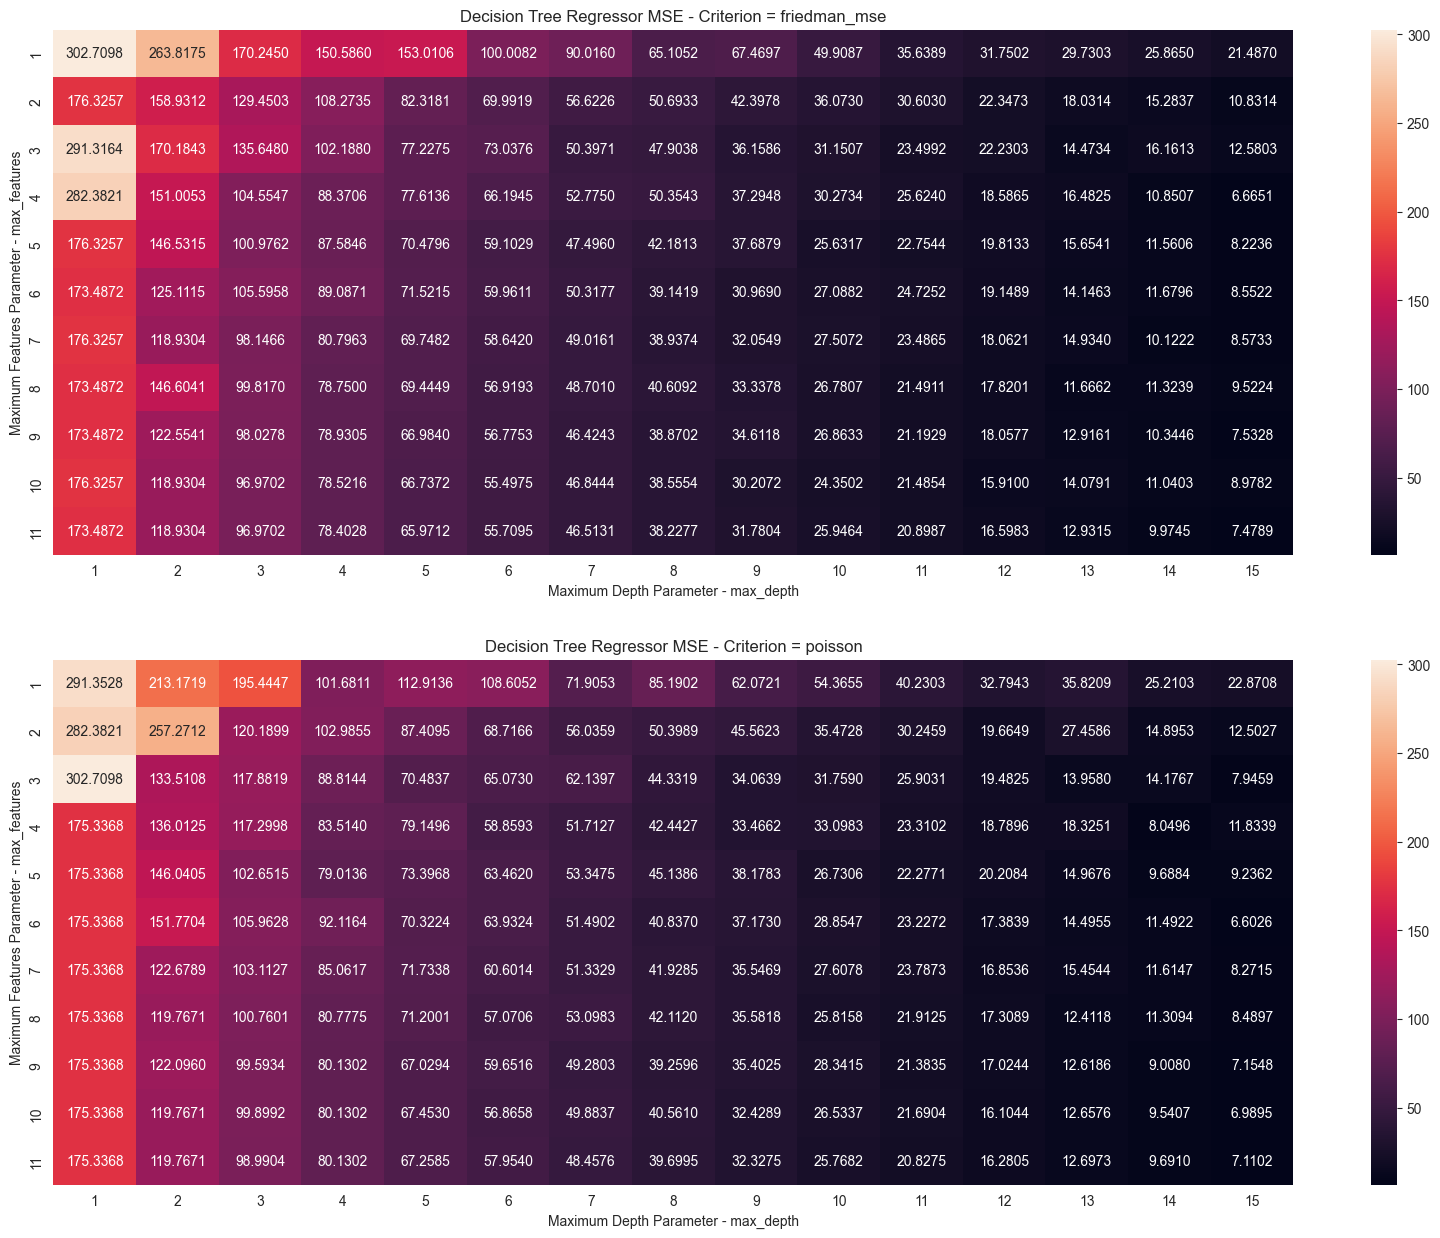

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
for i, (criterion, dataframe_criterion) in enumerate(heatmaps_dict.items()):
    sns.heatmap(data=dataframe_criterion, annot=True, fmt='.4f', ax=axes[i])
    axes[i].set_xlabel('Maximum Depth Parameter - max_depth')
    axes[i].set_ylabel('Maximum Features Parameter - max_features')
    axes[i].set_title(f'Decision Tree Regressor MSE - Criterion = {criterion}')

plt.show()

In [75]:
for i, (criterion, dataframe_criterion) in enumerate(heatmaps_dict.items()):
    best_mse = dataframe_criterion.min(axis=0).min()
    best_params = dataframe_criterion.stack().idxmin()
    best_max_depth_param = best_params[1]
    best_max_features_param = best_params[0]
    print(f'Criterion = {criterion}, Best MSE = {best_mse}, Best Max_Depth = {best_max_depth_param}, Best Max_Features = {best_max_features_param}')
    regression_results_table = pd.concat([regression_results_table,
                                          pd.DataFrame([['Decision Tree Regressor',
                                                         f'criterion = {criterion}, max_depth = {best_max_depth_param}, max_features = {best_max_features_param}',
                                                         best_mse]],
                                                       columns=regression_results_table.columns)],
                                         axis=0,
                                         ignore_index=True)

Criterion = friedman_mse, Best MSE = 6.665066355498424, Best Max_Depth = 15, Best Max_Features = 4
Criterion = poisson, Best MSE = 6.6026213710201045, Best Max_Depth = 15, Best Max_Features = 6


In [76]:
regression_results_table

,Model,Hyperparameter,Mean-Squared Error
0,KNN-Regressor,n_neighbors = 4,18.273805
1,Decision Tree Regressor,"criterion = friedman_mse, max_depth = 15, max_...",6.665066
2,Decision Tree Regressor,"criterion = poisson, max_depth = 15, max_featu...",6.602621


As a result, I obtained similar MSE Scores for the Decision Tree Regressor with both `friedman_mse` and `poisson` criterion. However, overall accuracy for `friedman_mse`
criterion is slightly better across different values of hyperparameters and performs faster. This is probably due to the fact that the rotor temperature `pm` is not count data,
that would make Poisson Function as a criterion for model training more suitable.

##### Task 11.9 - Random Forest Regressor
For this task, I had to create a Line Plot where on the X axis would be the `n_estimators` parameter and on the Y axis - the MSE of the models. On the Line Plot should
be 3 lines, one for each type of an another hyperparameter - `criterion`, which in the case of the first line will be `criterion = squared_error`, of the second line -
`criterion = absolute_error` and for the third line - `criterion = poisson`.
* `n_estimators` - is the number of Decision Trees in the forest. By nature, Random Forest Model works based on the one generalized decision (in case of Classification -
most frequent value, in case of Regression - mean or weighted average value) from multiple Decision Trees trained on randomly selected samples and randomly selected
features.
* `criterion` - the function that will measure the quality for each split. Specifically, there might be 4 possible parameters - `squared_error`, `absolute_error`,
`friedman_mse`and `poisson`

In [77]:
electric_motors_measures_df = electric_motors_measures_df_copy.sample(n=10000, random_state=42)
electric_motors_measures_X: pd.DataFrame = electric_motors_measures_df.drop(columns=['pm'])
electric_motors_measures_y: pd.Series = electric_motors_measures_df['pm']
(electric_motors_measures_X_train, electric_motors_measures_X_test,
 electric_motors_measures_y_train, electric_motors_measures_y_test) = train_test_split(electric_motors_measures_X,
                                                                                       electric_motors_measures_y,
                                                                                       test_size=.2,
                                                                                       random_state=42)

In [78]:
num_estimators_range = np.arange(start=1, stop=31, step=2)
criteria_array = np.array(['absolute_error', 'squared_error', 'poisson'], dtype=StringDType())

result_mse_df: pd.DataFrame = pd.DataFrame(dtype=float, index=num_estimators_range, columns=criteria_array)

for i, criterion in enumerate(criteria_array):
    start_time = time.time()
    for num_estimators_param in num_estimators_range:
        random_forest_regressor = RandomForestRegressor(criterion=criterion,
                                                        n_estimators=num_estimators_param)
        random_forest_regressor.fit(X=electric_motors_measures_X_train, y=electric_motors_measures_y_train)
        electric_motors_measures_y_hat = random_forest_regressor.predict(X=electric_motors_measures_X_test)
        mse = mean_squared_error(y_true=electric_motors_measures_y_test, y_pred=electric_motors_measures_y_hat)
        print(f'Criterion: {criterion}, Number of Estimators: {num_estimators_param}, MSE: {mse}')

        result_mse_df.loc[num_estimators_param, criterion] = mse
    end_time = time.time()
    total_time = (end_time - start_time) * 1000
    print(f"Time taken for Criterion = {criterion}: {total_time:.4f} milliseconds")

Criterion: absolute_error, Number of Estimators: 1, MSE: 50.781985526329485
Criterion: absolute_error, Number of Estimators: 3, MSE: 31.032123625882008
Criterion: absolute_error, Number of Estimators: 5, MSE: 26.703514105332804
Criterion: absolute_error, Number of Estimators: 7, MSE: 23.28602925242503
Criterion: absolute_error, Number of Estimators: 9, MSE: 22.5604398637525
Criterion: absolute_error, Number of Estimators: 11, MSE: 22.583505057950074
Criterion: absolute_error, Number of Estimators: 13, MSE: 21.01002517336067
Criterion: absolute_error, Number of Estimators: 15, MSE: 21.730685978041837
Criterion: absolute_error, Number of Estimators: 17, MSE: 21.250604564233313
Criterion: absolute_error, Number of Estimators: 19, MSE: 21.049056049982834
Criterion: absolute_error, Number of Estimators: 21, MSE: 19.896214823965543
Criterion: absolute_error, Number of Estimators: 23, MSE: 20.438208455230342
Criterion: absolute_error, Number of Estimators: 25, MSE: 20.991175204205437
Criterio

In [79]:
for i, criterion in enumerate(criteria_array):
    best_mse = result_mse_df[criterion].min()
    best_param = result_mse_df[criterion].idxmin()
    print(f'Criterion = {criterion}, Best MSE = {best_mse}, Best Num_Estimators = {best_param}')
    regression_results_table = pd.concat([regression_results_table,
                                          pd.DataFrame([['Random Forest Regressor',
                                                         f'criterion = {criterion}, n_estimators = {best_param}',
                                                         best_mse]],
                                                       columns=regression_results_table.columns)],
                                         axis=0,
                                         ignore_index=True)

Criterion = absolute_error, Best MSE = 19.896214823965543, Best Num_Estimators = 21
Criterion = squared_error, Best MSE = 17.789028353422786, Best Num_Estimators = 29
Criterion = poisson, Best MSE = 18.080666244673196, Best Num_Estimators = 25


In [80]:
regression_results_table

,Model,Hyperparameter,Mean-Squared Error
0,KNN-Regressor,n_neighbors = 4,18.273805
1,Decision Tree Regressor,"criterion = friedman_mse, max_depth = 15, max_...",6.665066
2,Decision Tree Regressor,"criterion = poisson, max_depth = 15, max_featu...",6.602621
3,Random Forest Regressor,"criterion = absolute_error, n_estimators = 21",19.896215
4,Random Forest Regressor,"criterion = squared_error, n_estimators = 29",17.789028
5,Random Forest Regressor,"criterion = poisson, n_estimators = 25",18.080666


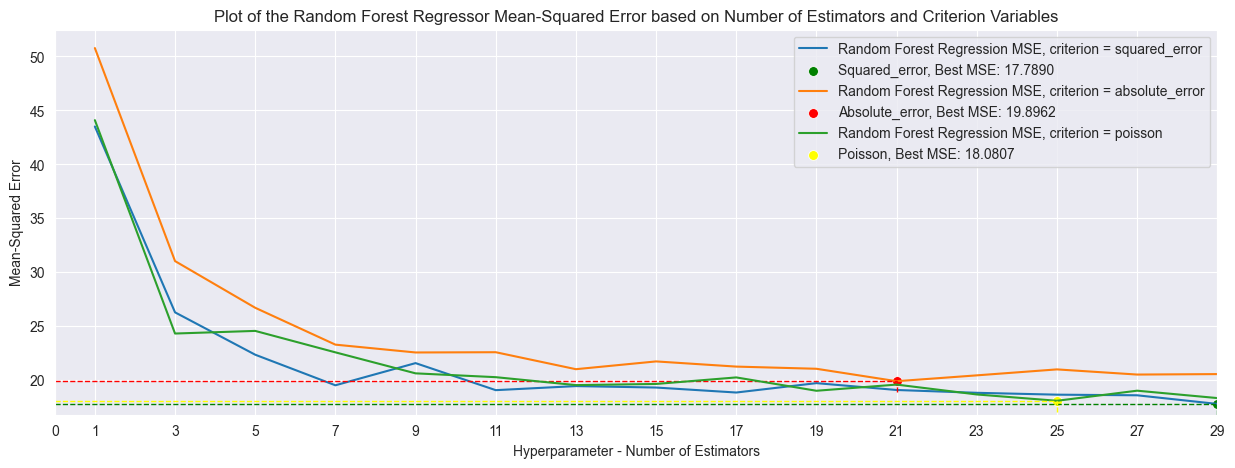

In [81]:
plt.figure(figsize=(15, 5))
mapping_plot_aspect = {
    'squared_error': 'green',
    'absolute_error': 'red',
    'poisson': 'yellow'
}
for criterion, color in mapping_plot_aspect.items():
    sns.lineplot(x=num_estimators_range, y=result_mse_df[criterion], label=f'Random Forest Regression MSE, criterion = {criterion}')

    sns.scatterplot(x=[result_mse_df[criterion].idxmin()],
                    y=[result_mse_df[criterion].min()],
                    markers="o",
                    s=50,
                    color=color,
                    label=f"{criterion.capitalize()}, Best MSE: %.4f" % np.min(a=result_mse_df[criterion]))

    plt.plot([result_mse_df[criterion].idxmin(), result_mse_df[criterion].idxmin()],
             [result_mse_df[criterion].min() - 1, result_mse_df[criterion].min()],
             linestyle='--',
             color=color,
             linewidth=1)
    plt.plot([0, result_mse_df[criterion].idxmin()],
             [result_mse_df[criterion].min(), result_mse_df[criterion].min()],
             linestyle='--',
             color=color,
             linewidth=1)

plt.title("Plot of the Random Forest Regressor Mean-Squared Error based on Number of Estimators and Criterion Variables")
plt.xlabel("Hyperparameter - Number of Estimators")
plt.ylabel("Mean-Squared Error")
plt.xticks(ticks=[0] + [i for i in num_estimators_range])
plt.xlim(left=0, right=num_estimators_range[-1])
plt.ylim(bottom=np.min(a=result_mse_df) - 1)
plt.legend()
plt.show()

As it may be noticed, the best performance is demonstrated by Squared Error criterion, which is generally better than both of the rest criteria. Number of estimators seems to
have an impact on low values, but at a certain point the difference is not considerable, as the values of MSE are fluctuating around a stable value for all if the models and
their criteria.

##### Task 11.10 - Support Vector Machine Regressor
For this task, I had to plot a Line Plot with 3 lines for each model with different kernel hyperparameter - `poly`, `rbf` and `sigmoid`. Also, the plot will have on X
axis the `C` hyperparameter, that was discussed above in Classification Section.

In [82]:
electric_motors_measures_df = electric_motors_measures_df_copy.sample(n=30000, random_state=42)
electric_motors_measures_X: pd.DataFrame = electric_motors_measures_df.drop(columns=['pm'])
electric_motors_measures_y: pd.Series = electric_motors_measures_df['pm']
(electric_motors_measures_X_train, electric_motors_measures_X_test,
 electric_motors_measures_y_train, electric_motors_measures_y_test) = train_test_split(electric_motors_measures_X,
                                                                                       electric_motors_measures_y,
                                                                                       test_size=.2,
                                                                                       random_state=42)

In [83]:
C_range = np.arange(start=1, stop=101, step=10)
kernel_array = np.array(['poly', 'rbf', 'sigmoid'], dtype=StringDType())

result_mse_df: pd.DataFrame = pd.DataFrame(dtype=float, index=C_range, columns=kernel_array)

for i, kernel in enumerate(kernel_array):
    start_time = time.time()
    for C_param in C_range:
        support_vector_machine_regressor = SVR(kernel=kernel,
                                                C=C_param)
        support_vector_machine_regressor.fit(X=electric_motors_measures_X_train, y=electric_motors_measures_y_train)
        electric_motors_measures_y_hat = support_vector_machine_regressor.predict(X=electric_motors_measures_X_test)
        mse = mean_squared_error(y_true=electric_motors_measures_y_test, y_pred=electric_motors_measures_y_hat)
        print(f'Kernel: {kernel}, C: {C_param}, MSE: {mse}')

        result_mse_df.loc[C_param, kernel] = mse
    end_time = time.time()
    total_time = (end_time - start_time) * 1000
    print(f"Time taken for Kernel = {kernel}: {total_time:.4f} milliseconds")

Kernel: poly, C: 1, MSE: 206.77657365995313
Kernel: poly, C: 11, MSE: 189.20878883415133
Kernel: poly, C: 21, MSE: 187.33914572274557
Kernel: poly, C: 31, MSE: 186.06055566666578
Kernel: poly, C: 41, MSE: 184.99137317856523
Kernel: poly, C: 51, MSE: 184.06768738144692
Kernel: poly, C: 61, MSE: 183.22371379042386
Kernel: poly, C: 71, MSE: 182.4482707966514
Kernel: poly, C: 81, MSE: 181.73506141925938
Kernel: poly, C: 91, MSE: 181.09776721506023
Time taken for Kernel = poly: 245649.3661 milliseconds
Kernel: rbf, C: 1, MSE: 180.3458115653034
Kernel: rbf, C: 11, MSE: 96.65068302766616
Kernel: rbf, C: 21, MSE: 89.12989782200536
Kernel: rbf, C: 31, MSE: 85.44926408192447
Kernel: rbf, C: 41, MSE: 83.08515875240951
Kernel: rbf, C: 51, MSE: 81.39606868244006
Kernel: rbf, C: 61, MSE: 80.09308498417518
Kernel: rbf, C: 71, MSE: 78.895512596844
Kernel: rbf, C: 81, MSE: 77.82850864300042
Kernel: rbf, C: 91, MSE: 76.9072311347177
Time taken for Kernel = rbf: 310546.2945 milliseconds
Kernel: sigmoid, 

In [86]:
for i, kernel in enumerate(kernel_array):
    best_mse = result_mse_df[kernel].min()
    best_param = result_mse_df[kernel].idxmin()
    print(f'Criterion = {kernel}, Best MSE = {best_mse}, Best C = {best_param}')
    regression_results_table = pd.concat([regression_results_table,
                                          pd.DataFrame([['SVM Regressor',
                                                         f'kernel = {kernel}, C = {best_param}',
                                                         best_mse]],
                                                       columns=regression_results_table.columns)],
                                         axis=0,
                                         ignore_index=True)

Criterion = poly, Best MSE = 181.09776721506023, Best C = 91
Criterion = rbf, Best MSE = 76.9072311347177, Best C = 91
Criterion = sigmoid, Best MSE = 701490.0068351595, Best C = 1


In [87]:
regression_results_table

,Model,Hyperparameter,Mean-Squared Error
0,KNN-Regressor,n_neighbors = 4,18.273805
1,Decision Tree Regressor,"criterion = friedman_mse, max_depth = 15, max_...",6.665066
2,Decision Tree Regressor,"criterion = poisson, max_depth = 15, max_featu...",6.602621
3,Random Forest Regressor,"criterion = absolute_error, n_estimators = 21",19.896215
4,Random Forest Regressor,"criterion = squared_error, n_estimators = 29",17.789028
5,Random Forest Regressor,"criterion = poisson, n_estimators = 25",18.080666
6,SVM Regressor,"kernel = poly, C = 91",181.097767
7,SVM Regressor,"kernel = rbf, C = 91",76.907231
8,SVM Regressor,"kernel = sigmoid, C = 1",701490.006835
9,SVM Regressor,"kernel = poly, C = 91",181.097767


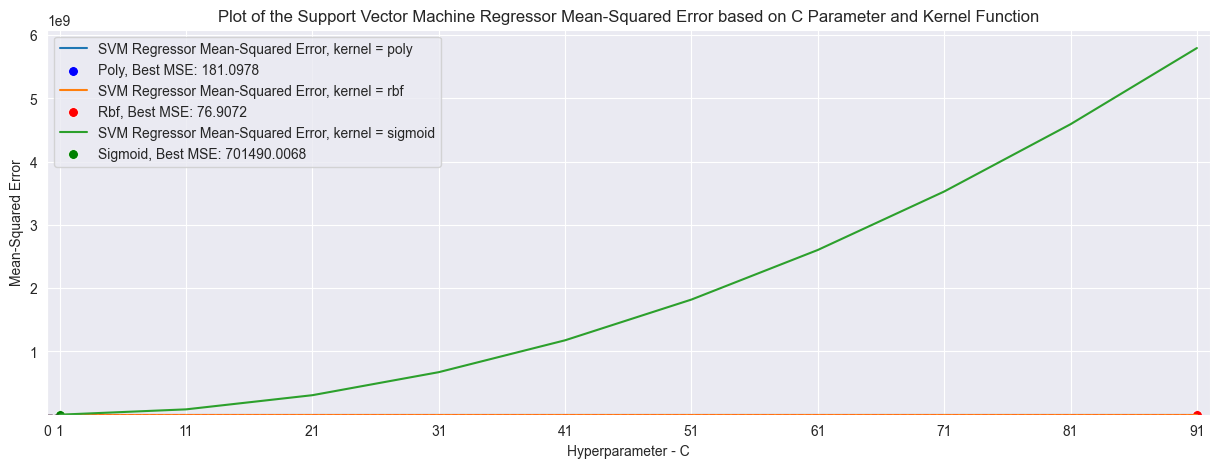

In [88]:
plt.figure(figsize=(15, 5))
mapping_plot_aspect = {
    'poly': 'blue',
    'rbf': 'red',
    'sigmoid': 'green'
}

for kernel, color in mapping_plot_aspect.items():
    sns.lineplot(x=C_range, y=result_mse_df[kernel], label=f'SVM Regressor Mean-Squared Error, kernel = {kernel}')

    sns.scatterplot(x=[result_mse_df[kernel].idxmin()],
                    y=[result_mse_df[kernel].min()],
                    markers="o",
                    s=50,
                    color=color,
                    label=f"{kernel.capitalize()}, Best MSE: %.4f" % np.min(a=result_mse_df[kernel]))

    plt.plot([result_mse_df[kernel].idxmin(), result_mse_df[kernel].idxmin()],
             [result_mse_df[kernel].min() - 1, result_mse_df[kernel].min()],
             linestyle='--',
             color=color,
             linewidth=1)
    plt.plot([0, result_mse_df[kernel].idxmin()],
             [result_mse_df[kernel].min(), result_mse_df[kernel].min()],
             linestyle='--',
             color=color,
             linewidth=1)

plt.title("Plot of the Support Vector Machine Regressor Mean-Squared Error based on C Parameter and Kernel Function")
plt.xlabel("Hyperparameter - C")
plt.ylabel("Mean-Squared Error")
plt.xticks(ticks=[0] + [i for i in C_range])
plt.xlim(left=0, right=C_range[-1] + 1)
plt.ylim(bottom=np.min(a=result_mse_df) - 1)
plt.legend()
plt.show()

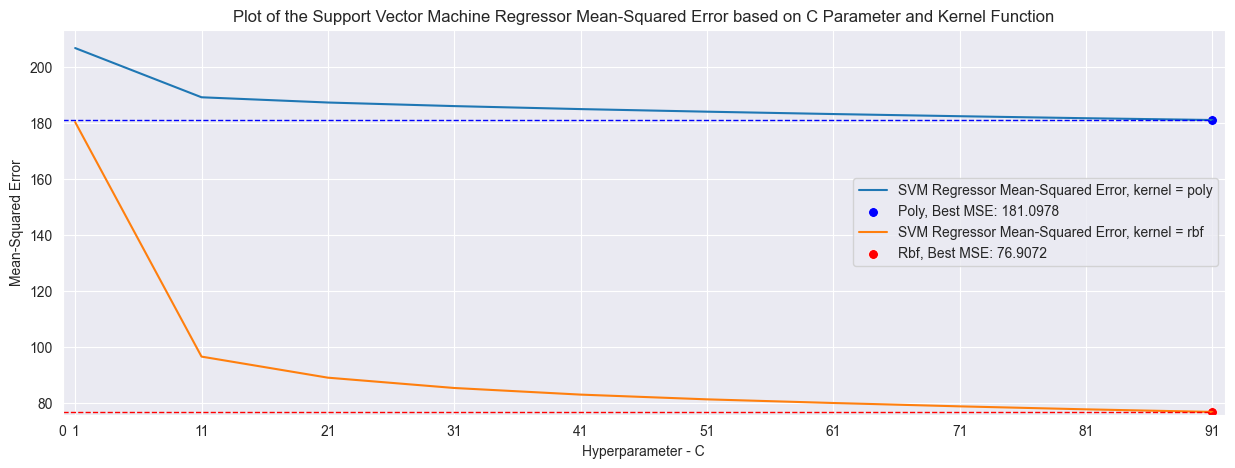

In [89]:
plt.figure(figsize=(15, 5))
mapping_plot_aspect = {
    'poly': 'blue',
    'rbf': 'red',
}

for kernel, color in mapping_plot_aspect.items():
    sns.lineplot(x=C_range, y=result_mse_df[kernel], label=f'SVM Regressor Mean-Squared Error, kernel = {kernel}')

    sns.scatterplot(x=[result_mse_df[kernel].idxmin()],
                    y=[result_mse_df[kernel].min()],
                    markers="o",
                    s=50,
                    color=color,
                    label=f"{kernel.capitalize()}, Best MSE: %.4f" % np.min(a=result_mse_df[kernel]))

    plt.plot([result_mse_df[kernel].idxmin(), result_mse_df[kernel].idxmin()],
             [result_mse_df[kernel].min() - 1, result_mse_df[kernel].min()],
             linestyle='--',
             color=color,
             linewidth=1)
    plt.plot([0, result_mse_df[kernel].idxmin()],
             [result_mse_df[kernel].min(), result_mse_df[kernel].min()],
             linestyle='--',
             color=color,
             linewidth=1)

plt.title("Plot of the Support Vector Machine Regressor Mean-Squared Error based on C Parameter and Kernel Function")
plt.xlabel("Hyperparameter - C")
plt.ylabel("Mean-Squared Error")
plt.xticks(ticks=[0] + [i for i in C_range])
plt.xlim(left=0, right=C_range[-1] + 1)
plt.ylim(bottom=np.min(a=result_mse_df) - 1)
plt.legend()
plt.show()

As it may be seen, the best performance was by SVM Regressor with RBF Kernel. Overall, parameter `C` has shown improvement on the first few values, while on next values higher
than 20 it showed very small performance boost. Sigmoid Kernel showed the worst performance with very high values of MSE. RBF performed better probably because the data is
distributed variously and has non-linear relationship.

In [100]:
regression_results_table

,Model,Hyperparameter,Mean-Squared Error
0,KNN-Regressor,n_neighbors = 4,18.273805
1,Decision Tree Regressor,"criterion = friedman_mse, max_depth = 15, max_...",6.665066
2,Decision Tree Regressor,"criterion = poisson, max_depth = 15, max_featu...",6.602621
3,Random Forest Regressor,"criterion = absolute_error, n_estimators = 21",19.896215
4,Random Forest Regressor,"criterion = squared_error, n_estimators = 29",17.789028
5,Random Forest Regressor,"criterion = poisson, n_estimators = 25",18.080666
6,SVM Regressor,"kernel = poly, C = 91",181.097767
7,SVM Regressor,"kernel = rbf, C = 91",76.907231
8,SVM Regressor,"kernel = sigmoid, C = 1",701490.006835
